In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv("G:\CovidDataset\Data\covid-data(cleaned).csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\asus\AppData\Local\Temp\ipykernel_27868\947282433.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("G:\CovidDataset\Data\covid-data(cleaned).csv")


In [93]:
df_latest = df[df['date'] == df['date'].max()].copy()

df_latest['death_rate'] = df_latest['total_deaths'] / df_latest['total_cases']
df_latest['cases_per_million'] = df_latest['total_cases']/1000000

In [94]:
df_latest

,continent,country,date,total_cases,new_cases,total_deaths,new_deaths,population,population_density,death_rate,cases_per_million
1673,Asia,Afghanistan,2024-08-04,235214,0.0,7998.0,0.0,41128772,54.42,0.034003,0.235214
3347,Europe,Albania,2024-08-04,335047,0.0,3605.0,0.0,2842318,104.87,0.010760,0.335047
5021,Africa,Algeria,2024-08-04,272139,18.0,6881.0,0.0,44903228,17.35,0.025285,0.272139
6695,Oceania,American Samoa,2024-08-04,8359,0.0,34.0,0.0,44295,278.20,0.004067,0.008359
8369,Europe,Andorra,2024-08-04,48015,0.0,159.0,0.0,79843,163.76,0.003311,0.048015
...,...,...,...,...,...,...,...,...,...,...,...
379997,Asia,Vietnam,2024-08-04,11624000,0.0,43206.0,0.0,98186856,308.13,0.003717,11.624000
381671,Oceania,Wallis and Futuna,2024-08-04,3760,0.0,9.0,0.0,11596,NaN,0.002394,0.003760
383345,Asia,Yemen,2024-08-04,11945,0.0,2159.0,0.0,33696612,53.51,0.180745,0.011945
385019,Africa,Zambia,2024-08-04,349842,18.0,4077.0,0.0,20017670,23.00,0.011654,0.349842


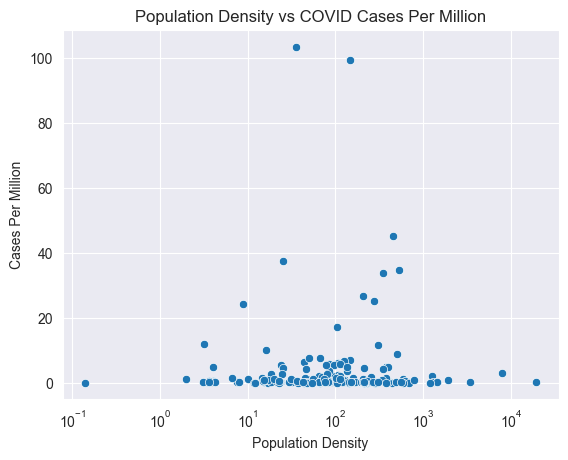

In [95]:
sns.scatterplot(data=df_latest, x='population_density', y='cases_per_million')
plt.title("Population Density vs COVID Cases Per Million")
plt.xlabel("Population Density")
plt.ylabel("Cases Per Million")
plt.xscale('log')
plt.show()

In [96]:
df_population = df.groupby('country').tail(1).groupby("continent")["population"].sum()
df_population

continent
Africa           1426160609
Asia             4688036653
Europe            548669798
North America     600323657
Oceania            45038907
South America     436816679
Name: population, dtype: int64

In [97]:
continents_cases = df.groupby('continent')['total_cases'].max().sort_values(ascending=False).reset_index()
continents_deaths = df.groupby('continent')['total_deaths'].max().sort_values(ascending=False).reset_index()

In [98]:
continents_by_deaths = (pd.merge(continents_cases, continents_deaths, on='continent', how='outer')
                    .sort_values('total_deaths', ascending=False).reset_index(drop=True))

In [99]:
continents_by_deaths = pd.merge(continents_by_deaths, df_population, on='continent', how='left')
continents_by_deaths

,continent,total_cases,total_deaths,population
0,North America,103436829,1193165.0,600323657
1,South America,37511921,702116.0,436816679
2,Asia,99373219,533623.0,4688036653
3,Europe,26781078,403188.0,548669798
4,Africa,4072765,102595.0,1426160609
5,Oceania,11861161,25236.0,45038907


In [100]:
continents_by_deaths['death_rate'] = continents_by_deaths['total_deaths'] / continents_by_deaths['total_cases']
continents_by_deaths['death_rate_percent'] = continents_by_deaths['death_rate'] * 100

In [101]:
continents_by_deaths

,continent,total_cases,total_deaths,population,death_rate,death_rate_percent
0,North America,103436829,1193165.0,600323657,0.011535,1.153520
1,South America,37511921,702116.0,436816679,0.018717,1.871714
2,Asia,99373219,533623.0,4688036653,0.005370,0.536989
3,Europe,26781078,403188.0,548669798,0.015055,1.505496
4,Africa,4072765,102595.0,1426160609,0.025191,2.519050
5,Oceania,11861161,25236.0,45038907,0.002128,0.212762


In [102]:
continents_by_case = continents_by_deaths.sort_values('total_cases', ascending=False).reset_index(drop=True)

In [103]:
continents_by_case

,continent,total_cases,total_deaths,population,death_rate,death_rate_percent
0,North America,103436829,1193165.0,600323657,0.011535,1.153520
1,Asia,99373219,533623.0,4688036653,0.005370,0.536989
2,South America,37511921,702116.0,436816679,0.018717,1.871714
3,Europe,26781078,403188.0,548669798,0.015055,1.505496
4,Oceania,11861161,25236.0,45038907,0.002128,0.212762
5,Africa,4072765,102595.0,1426160609,0.025191,2.519050


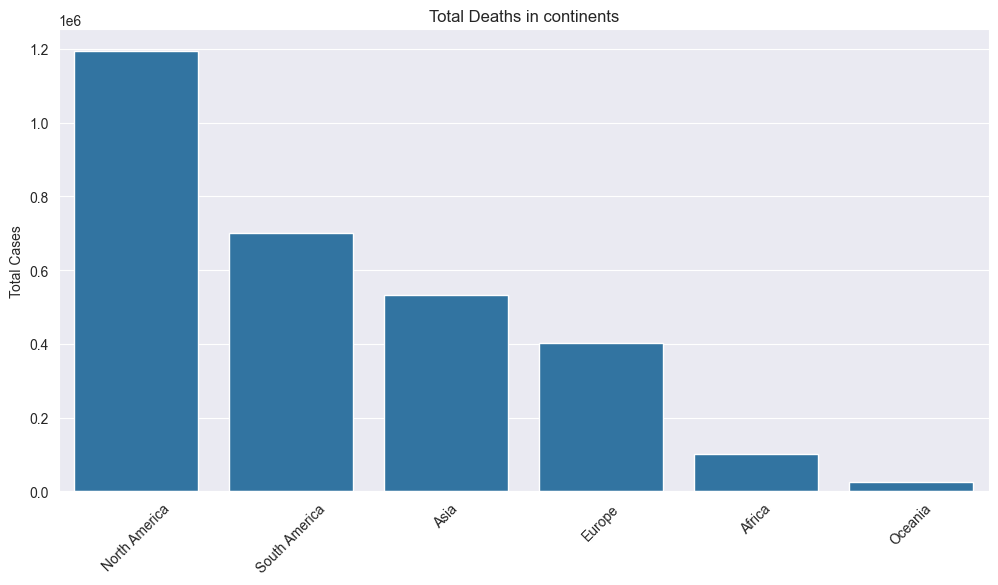

In [104]:
plt.figure(figsize=(12, 6))
sns.barplot(x=continents_by_deaths['continent'].values, y=continents_by_deaths["total_deaths"].values)
plt.title("Total Deaths in continents")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.show()

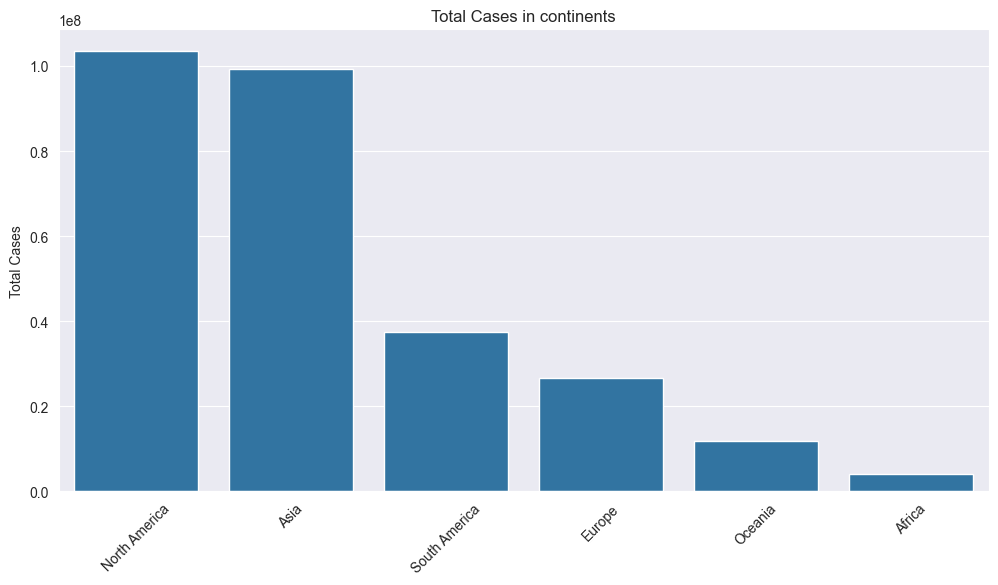

In [108]:
plt.figure(figsize=(12, 6))
sns.barplot(x=continents_by_case['continent'].values, y=continents_by_case["total_cases"].values)
plt.title("Total Cases in continents")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.show()